# Sales prediction using Linear regression model


In [51]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [52]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


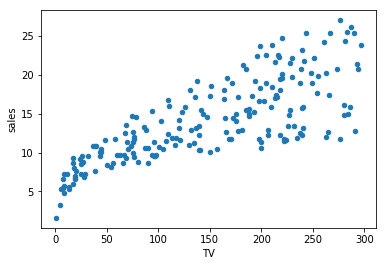

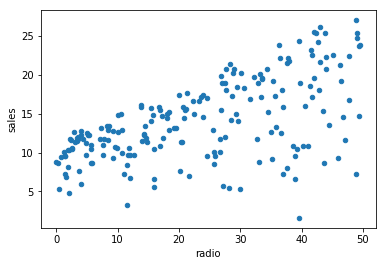

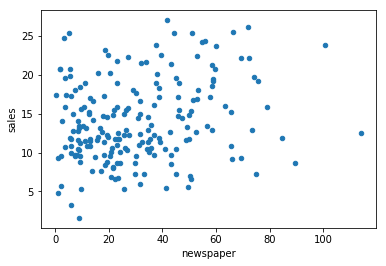

In [53]:
data.plot(kind="scatter", x="TV", y="sales")
data.plot(kind="scatter", x="radio", y="sales")
data.plot(kind="scatter", x="newspaper", y="sales")

In [54]:
normalized_data = (data - data.mean())/data.std()

In [55]:
train_set, test_set = train_test_split(normalized_data, test_size=0.2, random_state=100)
train_X, train_Y = train_set[['TV', 'radio', 'newspaper']], train_set[['sales']]
test_X, test_Y = test_set[['TV', 'radio', 'newspaper']], test_set[['sales']]

In [70]:
# Linear regression model implemention
def linear_regression_model():
    weights = None
    bias = None
    epochs = 150
    regularization = 0.1
    
    X = tf.placeholder(tf.float32, shape=train_X.shape, name='X')
    Y = tf.placeholder(tf.float32, shape=train_Y.shape, name='Y')

    w = tf.Variable(0.01*tf.random_normal(shape=(train_X.shape[1],1)), name='W')
    b = tf.Variable(0.0, name='b')

    Y_predicted = tf.matmul(X, w) + b

    loss = tf.reduce_mean(tf.square(Y - Y_predicted, name='loss') + regularization*tf.reduce_sum(tf.square(w))) 

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(epochs):
            loss_val,_ = sess.run([loss, optimizer], feed_dict={X: train_X, Y: train_Y})
        weights, bias = sess.run([w, b])
    
    return weights, bias
    

In [71]:
weights, bias = linear_regression_model()

In [72]:
test_Y_ = np.dot(test_X, weights) + bias

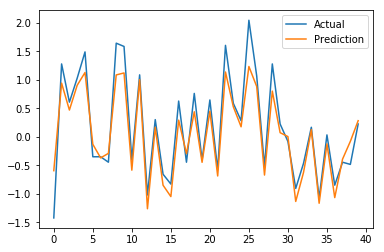

In [73]:
x = np.arange(0, test_Y.shape[0])
plt.plot(x, test_Y, '-', label="Actual")
plt.plot(x, test_Y_, '-', label="Prediction")
plt.legend()
plt.show()